# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import model_prediction
import datetime as dt
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

In [2]:
df = pd.read_csv('leads-and-customers.csv')

In [3]:
df.head()

,address,birthdate,mail,name,sex,username,days_since_signup,acquisition_channel,job_title,company_size,completed_form,visited_pricing,registered_for_webinar,attended_webinar,industry,converted,is_manager,acquisition_channel_Cold Call,acquisition_channel_Cold Email,acquisition_channel_Organic Search,acquisition_channel_Paid Leads,acquisition_channel_Paid Search,company_size_1-10,company_size_1000-10000,company_size_10001+,company_size_101-250,company_size_11-50,company_size_251-1000,company_size_51-100,industry_Financial Services,industry_Furniture,industry_Heavy Manufacturing,Scandanavion Design,Transportation,Internet,score
0,"27105 Christopher Station\nKevinborough, WA 91...",08/08/10,qturner@hotmail.com,Samuel Simpson,M,debrapeterson,18,Organic Search,Marketing Director,11/01/50,1,1,0,0,Web & Internet,1,True,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,151.000000
1,"78597 Gina Grove\nNorth Rebeccaberg, IL 61475",12/04/81,carramy@yahoo.com,Angelica Sanchez,F,mbrooks,3,Organic Search,Promotion Manager,251-1000,1,0,1,0,Web & Internet,0,False,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,141.358438
2,"0628 Sanders Plains\nLake Jenna, VA 56410",04/25/79,sbrown@yahoo.com,Connie Taylor,F,aarongriffin,26,Organic Search,Information Systems Manager,1000-10000,0,1,0,0,Web & Internet,0,False,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,120.448748
3,"9774 Moore Square Suite 477\nGonzalezfurt, OR ...",07/13/05,bdixon@gmail.com,Alexis Jones,F,jeffreymorales,19,Cold Email,Territory Sales Manager,10-Jan,1,1,1,1,Web & Internet,1,False,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,250.335264
4,"77324 John Tunnel\nSouth Shirleyfort, WA 36499...",06/19/73,harrisandrea@gmail.com,Lisa Wright,F,hamiltoncameron,7,Organic Search,Data Processing Manager,10001,1,1,0,0,Web & Internet,0,False,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.000000


# Preview Data

In [4]:
df.shape

(100000, 36)

In [5]:
# unique values count - categoric columns
df.describe(include=object).iloc[1].sort_values(ascending=False)

address                100000
mail                    85922
username                71872
name                    71036
birthdate               16980
job_title                  32
company_size                7
industry                    6
acquisition_channel         5
sex                         2
Name: unique, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 36 columns):
address                               100000 non-null object
birthdate                             100000 non-null object
mail                                  100000 non-null object
name                                  100000 non-null object
sex                                   100000 non-null object
username                              100000 non-null object
days_since_signup                     100000 non-null int64
acquisition_channel                   100000 non-null object
job_title                             100000 non-null object
company_size                          100000 non-null object
completed_form                        100000 non-null int64
visited_pricing                       100000 non-null int64
registered_for_webinar                100000 non-null int64
attended_webinar                      100000 non-null int64
industry                              100

In [7]:
# Check for null data
df.isnull().sum()

address                               0
birthdate                             0
mail                                  0
name                                  0
sex                                   0
username                              0
days_since_signup                     0
acquisition_channel                   0
job_title                             0
company_size                          0
completed_form                        0
visited_pricing                       0
registered_for_webinar                0
attended_webinar                      0
industry                              0
converted                             0
is_manager                            0
acquisition_channel_Cold Call         0
acquisition_channel_Cold Email        0
acquisition_channel_Organic Search    0
acquisition_channel_Paid Leads        0
acquisition_channel_Paid Search       0
company_size_1-10                     0
company_size_1000-10000               0
company_size_10001+                   0


In [8]:
df.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
days_since_signup,100000.0,14.549550,8.640902,0.00000,7.000000,15.000000,22.000000,29.000000
completed_form,100000.0,0.800380,0.399717,0.00000,1.000000,1.000000,1.000000,1.000000
visited_pricing,100000.0,0.880250,0.324671,0.00000,1.000000,1.000000,1.000000,1.000000
registered_for_webinar,100000.0,0.199750,0.399814,0.00000,0.000000,0.000000,0.000000,1.000000
attended_webinar,100000.0,0.100700,0.300933,0.00000,0.000000,0.000000,0.000000,1.000000
converted,100000.0,0.228260,0.419713,0.00000,0.000000,0.000000,0.000000,1.000000
acquisition_channel_Cold Call,100000.0,0.200730,0.400548,0.00000,0.000000,0.000000,0.000000,1.000000
acquisition_channel_Cold Email,100000.0,0.249960,0.432992,0.00000,0.000000,0.000000,0.000000,1.000000
acquisition_channel_Organic Search,100000.0,0.401220,0.490148,0.00000,0.000000,0.000000,1.000000,1.000000
acquisition_channel_Paid Leads,100000.0,0.049510,0.216931,0.00000,0.000000,0.000000,0.000000,1.000000


In [9]:
df.describe(include=np.number).T['mean'].sort_values(ascending=False)

score                                 120.906901
days_since_signup                      14.549550
visited_pricing                         0.880250
completed_form                          0.800380
Internet                                0.599120
acquisition_channel_Organic Search      0.401220
company_size_251-1000                   0.250670
acquisition_channel_Cold Email          0.249960
converted                               0.228260
industry_Financial Services             0.202450
company_size_51-100                     0.201240
acquisition_channel_Cold Call           0.200730
registered_for_webinar                  0.199750
company_size_101-250                    0.169150
company_size_1000-10000                 0.120330
company_size_11-50                      0.109890
attended_webinar                        0.100700
company_size_1-10                       0.098980
acquisition_channel_Paid Search         0.098580
Transportation                          0.095500
company_size_10001+ 

In [10]:
# Correlation Coefficient
df.select_dtypes(include=[np.number]).corr()['score'].sort_values(ascending=False)

score                                 1.000000
converted                             0.623385
attended_webinar                      0.571215
registered_for_webinar                0.428245
Internet                              0.192655
industry_Financial Services           0.112521
completed_form                        0.080088
visited_pricing                       0.069305
acquisition_channel_Organic Search    0.064552
acquisition_channel_Paid Leads        0.056702
company_size_251-1000                 0.048368
company_size_1000-10000               0.034995
company_size_101-250                  0.005849
company_size_10001+                  -0.006004
company_size_11-50                   -0.014539
company_size_51-100                  -0.018248
acquisition_channel_Cold Call        -0.025621
acquisition_channel_Paid Search      -0.038149
days_since_signup                    -0.039564
Scandanavion Design                  -0.049340
acquisition_channel_Cold Email       -0.051515
company_size_

# Graph Data

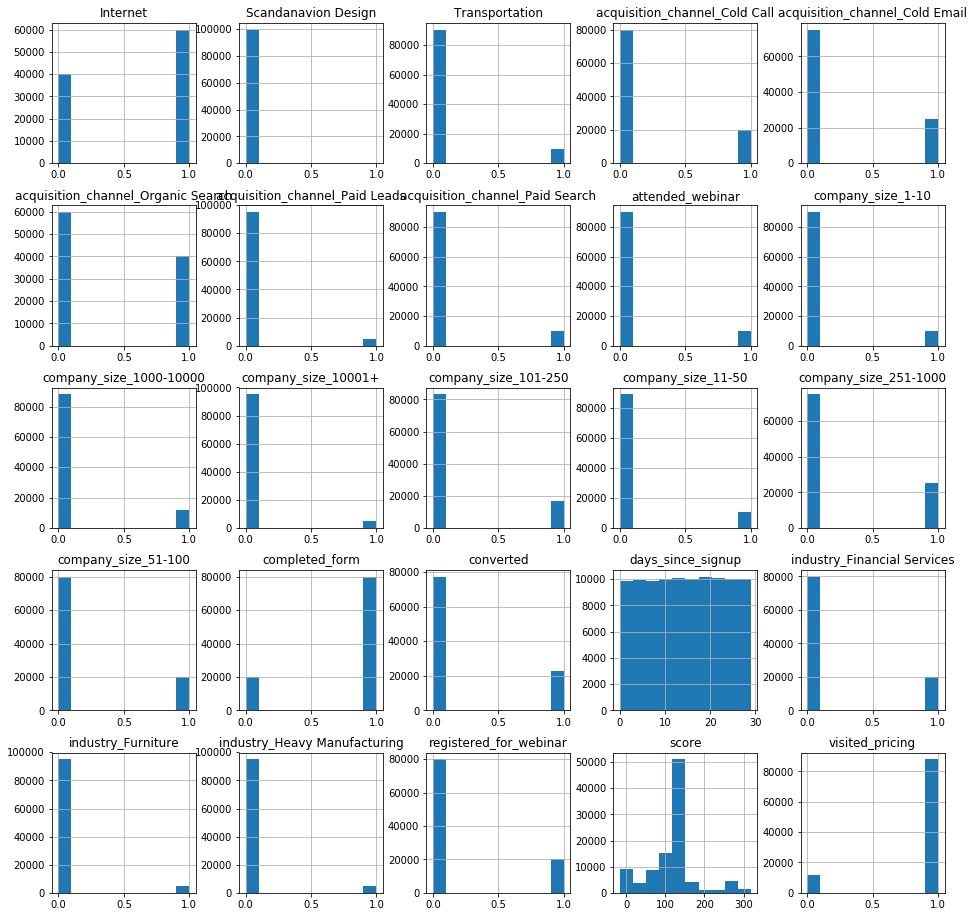

In [11]:
df.select_dtypes(include=[np.number]).hist(figsize=(16,16))
plt.show();

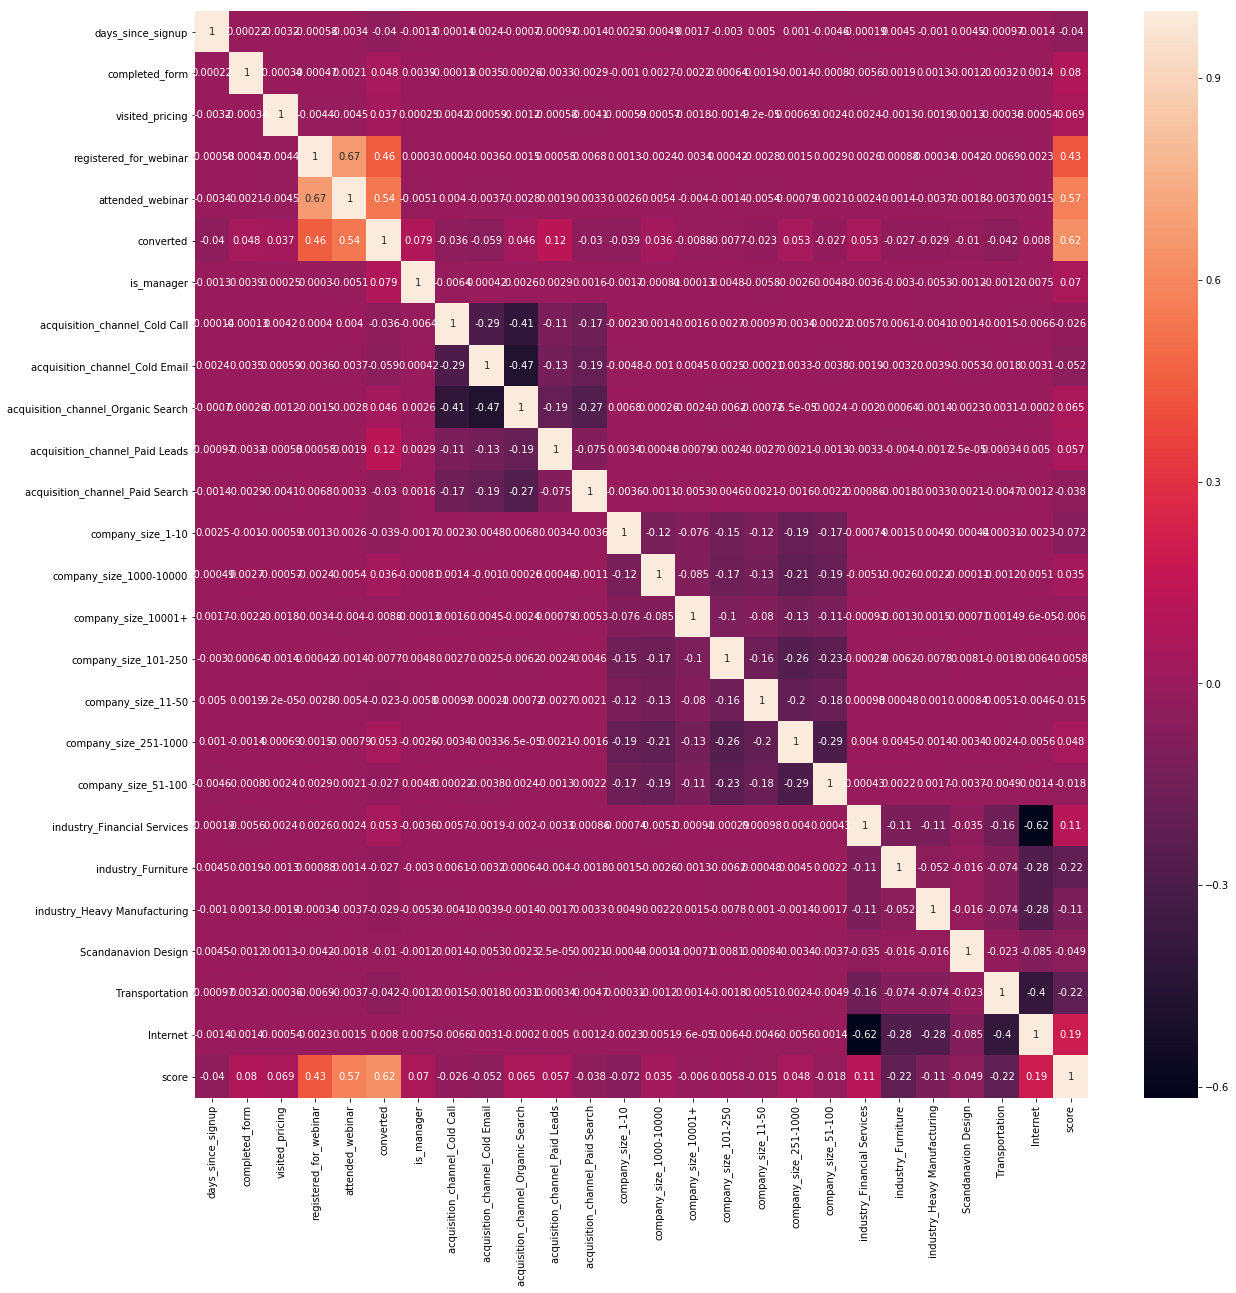

In [12]:
fig = plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(),annot=True)
plt.show();

In [13]:
df.select_dtypes(include=[np.number])

,days_since_signup,completed_form,visited_pricing,registered_for_webinar,attended_webinar,converted,acquisition_channel_Cold Call,acquisition_channel_Cold Email,acquisition_channel_Organic Search,acquisition_channel_Paid Leads,acquisition_channel_Paid Search,company_size_1-10,company_size_1000-10000,company_size_10001+,company_size_101-250,company_size_11-50,company_size_251-1000,company_size_51-100,industry_Financial Services,industry_Furniture,industry_Heavy Manufacturing,Scandanavion Design,Transportation,Internet,score
0,18,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,151.000000
1,3,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,141.358438
2,26,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,120.448748
3,19,1,1,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,250.335264
4,7,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.000000
5,19,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,131.045104
6,4,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,139.291997
7,18,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,27.005505
8,22,0,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,273.218420
9,14,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,103.527152


# Data Cleaning and Engineering

## Clean data

In [14]:
# Extract zip code and birthyear into separate columns
# Convert Boolean into Number
df['zip'] = df['address'].str.rsplit(' ',1).str[-1].str.rsplit('-',1).str[0]
df['birthyear'] = df.birthdate.apply(lambda x: x[-2:]).astype(int)
df = df.replace({True: 1, False: 0, 'M': 1, 'F': 0})
df.head()

,address,birthdate,mail,name,sex,username,days_since_signup,acquisition_channel,job_title,company_size,completed_form,visited_pricing,registered_for_webinar,attended_webinar,industry,converted,is_manager,acquisition_channel_Cold Call,acquisition_channel_Cold Email,acquisition_channel_Organic Search,acquisition_channel_Paid Leads,acquisition_channel_Paid Search,company_size_1-10,company_size_1000-10000,company_size_10001+,company_size_101-250,company_size_11-50,company_size_251-1000,company_size_51-100,industry_Financial Services,industry_Furniture,industry_Heavy Manufacturing,Scandanavion Design,Transportation,Internet,score,zip,birthyear
0,"27105 Christopher Station\nKevinborough, WA 91...",08/08/10,qturner@hotmail.com,Samuel Simpson,1,debrapeterson,18,Organic Search,Marketing Director,11/01/50,1,1,0,0,Web & Internet,1,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,151.000000,91949,10
1,"78597 Gina Grove\nNorth Rebeccaberg, IL 61475",12/04/81,carramy@yahoo.com,Angelica Sanchez,0,mbrooks,3,Organic Search,Promotion Manager,251-1000,1,0,1,0,Web & Internet,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,141.358438,61475,81
2,"0628 Sanders Plains\nLake Jenna, VA 56410",04/25/79,sbrown@yahoo.com,Connie Taylor,0,aarongriffin,26,Organic Search,Information Systems Manager,1000-10000,0,1,0,0,Web & Internet,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,120.448748,56410,79
3,"9774 Moore Square Suite 477\nGonzalezfurt, OR ...",07/13/05,bdixon@gmail.com,Alexis Jones,0,jeffreymorales,19,Cold Email,Territory Sales Manager,10-Jan,1,1,1,1,Web & Internet,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,250.335264,08748,5
4,"77324 John Tunnel\nSouth Shirleyfort, WA 36499...",06/19/73,harrisandrea@gmail.com,Lisa Wright,0,hamiltoncameron,7,Organic Search,Data Processing Manager,10001,1,1,0,0,Web & Internet,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.000000,36499,73


In [15]:
# Year born is conspicuous, it could be 1900 or 2000
df2 = pd.DataFrame({'birth_year' : df.birthyear.value_counts().index,
                    'count' : df.birthyear.value_counts().values})
df2['age_1900'] = df2.birth_year.apply(lambda x: 2019-(1900+x)).astype(int)
df2['age_2000'] = df2.birth_year.apply(lambda x: 2019-(2000+x)).astype(int)
df2.describe()

,birth_year,count,age_1900,age_2000
count,48.000000,48.000000,48.000000,48.000000
mean,57.083333,2083.333333,61.916667,-38.083333
std,37.559504,333.168498,37.559504,37.559504
min,0.000000,2.000000,20.000000,-80.000000
25%,11.750000,2102.500000,31.750000,-68.250000
50%,75.500000,2145.500000,43.500000,-56.500000
75%,87.250000,2176.750000,107.250000,7.250000
max,99.000000,2246.000000,119.000000,19.000000


In [16]:
df.describe()

,sex,days_since_signup,completed_form,visited_pricing,registered_for_webinar,attended_webinar,converted,is_manager,acquisition_channel_Cold Call,acquisition_channel_Cold Email,acquisition_channel_Organic Search,acquisition_channel_Paid Leads,acquisition_channel_Paid Search,company_size_1-10,company_size_1000-10000,company_size_10001+,company_size_101-250,company_size_11-50,company_size_251-1000,company_size_51-100,industry_Financial Services,industry_Furniture,industry_Heavy Manufacturing,Scandanavion Design,Transportation,Internet,score,birthyear
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.49852,14.549550,0.800380,0.880250,0.199750,0.100700,0.228260,0.37603,0.200730,0.249960,0.401220,0.049510,0.098580,0.098980,0.120330,0.049740,0.169150,0.109890,0.250670,0.201240,0.202450,0.049030,0.049060,0.004840,0.095500,0.599120,120.906901,57.280630
std,0.50000,8.640902,0.399717,0.324671,0.399814,0.300933,0.419713,0.48439,0.400548,0.432992,0.490148,0.216931,0.298099,0.298637,0.325349,0.217408,0.374886,0.312754,0.433401,0.400929,0.401828,0.215932,0.215994,0.069402,0.293906,0.490079,61.736850,37.473854
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.750840,0.000000
25%,0.00000,7.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.694753,11.000000
50%,0.00000,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,127.790216,76.000000
75%,1.00000,22.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,146.843631,88.000000
max,1.00000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,318.778789,99.000000


## Groupby zip and converted

In [17]:
pd.DataFrame({'count' : df.groupby( [ "zip",'converted'] ).size()}).reset_index().sort_values(['converted', 'count','zip'], ascending=[False, False, True])

,zip,converted,count
9645,12878,1,4
13601,18277,1,4
18947,25462,1,4
20960,28113,1,4
24855,33442,1,4
36982,49830,1,4
53669,72460,1,4
54285,73303,1,4
61256,82693,1,4
1636,02190,1,3


In [18]:
pd.DataFrame({'average_conversion_rate' : df.groupby( [ "zip"] )['converted'].mean()}).reset_index().sort_values(['average_conversion_rate','zip'], ascending=[False, False]).T

,63153,63145,63137,63127,63120,63109,63102,63098,63096,63094,63087,63044,63026,63025,63024,63013,63011,63000,62998,62996,62992,62990,62978,62977,62976,62970,62965,62947,62944,62927,62912,62903,62896,62891,62890,62881,62868,62859,62855,62852,62850,62840,62837,62829,62815,62808,62799,62798,62797,62786,62783,62780,62775,62767,62766,62749,62746,62741,62739,62735,62734,62713,62708,62689,62686,62683,62681,62670,62669,62660,62658,62657,62656,62653,62649,62633,62623,62621,62612,62606,62597,62594,62593,62592,62589,62586,62581,62573,62571,62566,62552,62548,62530,62527,62521,62520,62518,62513,62511,62505,62502,62500,62499,62466,62461,62440,62436,62435,62432,62429,62423,62420,62411,62409,62408,62404,62402,62399,62377,62376,62375,62365,62362,62347,62343,62336,62316,62315,62298,62292,62287,62280,62264,62263,62245,62244,62229,62225,62220,62217,62211,62194,62193,62182,62172,62169,62162,62158,62155,62148,62145,62142,62141,62125,62124,62115,62114,62091,62088,62087,62071,62065,62063,62057,62056,62054,62052,62047,62044,62041,62035,62034,62026,62013,61996,61970,61968,61967,61964,61958,61955,61954,61944,61943,61939,61936,61925,61919,61918,61902,61899,61891,61886,61875,61874,61869,61865,61825,61812,61807,61797,61793,61790,61786,61775,61769,61767,61753,61730,61729,61726,61716,61710,61707,61702,61701,61688,61686,61679,61676,61666,61662,61661,61651,61649,61642,61620,61613,61582,61573,61572,61560,61553,61552,61551,61549,61539,61537,61532,61530,61526,61523,61519,61514,61504,61495,61468,61464,61460,61446,...,376,374,373,370,369,368,367,366,365,364,363,362,361,360,358,357,355,354,353,352,351,350,348,347,346,342,341,340,338,337,335,332,331,330,329,328,327,323,321,319,318,316,315,314,311,308,307,304,303,302,301,300,295,294,293,292,291,289,287,285,283,281,279,277,275,273,272,269,268,267,266,261,260,259,258,257,256,255,254,251,247,246,245,243,241,240,238,237,236,233,232,231,230,229,228,227,226,225,222,221,220,219,218,216,214,213,212,211,208,207,206,205,204,203,202,201,200,196,195,194,192,191,189,188,187,186,185,184,183,181,180,179,178,177,175,174,173,172,171,170,169,168,165,164,161,160,159,157,156,155,154,152,151,150,147,146,145,144,142,141,140,139,138,137,136,135,134,133,131,130,129,128,127,126,125,124,123,122,121,120,119,118,117,116,115,112,110,109,108,107,106,104,102,101,99,98,96,94,93,92,88,87,85,84,82,81,77,76,74,73,72,70,67,65,63,57,55,51,50,49,48,46,45,44,43,42,41,37,33,32,30,28,25,23,21,19,18,17,14,13,12,10,9,8,5,4,3,2,1,0
zip,99992,99974,99963,99947,99932,99913,99903,99895,99893,99891,99881,99807,99769,99768,99766,99749,99747,99734,99731,99727,99722,99716,99699,99697,99696,99687,99679,99654,99647,99620,99599,99583,99566,99556,99553,99538,99513,99497,99492,99486,99484,99471,99467,99456,99438,99426,99411,99410,99408,99396,99393,99388,99381,99367,99366,99333,99330,99321,99319,99312,99311,99265,99259,99233,99229,99224,99222,99205,99204,99187,99185,99184,99183,99177,99172,99145,99131,99127,99115,99104,99088,99082,99081,99078,99072,99067,99059,99041,99038,99032,99009,99005,98977,98974,98966,98965,98963,98956,98954,98947,98942,98940,98937,98893,98885,98848,98842,98841,98837,98834,98826,98821,98808,98804,98803,98798,98796,98788,98759,98758,98757,98744,98740,98713,98707,98699,98660,98659,98637,98626,98615,98602,98576,98575,98548,98547,98524,98518,98513,98508,98502,98478,98477,98458,98446,98443,98432,98427,98422,98407,98404,98401,98400,98377,98376,98360,98359,98325,98322,98319,98298,98285,98283,98273,98272,98270,98266,98259,98256,98252,98240,98238,98225,98206,98180,98139,98133,98132,98128,98119,98114,98111,98097,98093,98086,98083,98067,98058,98057,98024,98020,98012,98000,97980,97978,97969,97964,97906,97887,97879,97864,97858,97853,97848,97832,97822,97818,97792,97752,97749,97745,97731,97721,97715,97701,97698,97678,97674,97662,97658,97645,97640,97639,97622,97620,97607,97576,97562,97503,97488,97487,97464,97454,97453,97452,97450,97434,97432,97427,97422,97412,97407,97400,97391,97375,97364,97321,97315,97311,97279,...,00582,00579,00577,00574,00573,00572,00569,00566,005

In [19]:
# Customers with 100% Conversion rate
bestdf = pd.DataFrame({'average_conversion_rate' : df.groupby( ["sex","days_since_signup","company_size","completed_form",
                                                                "visited_pricing","registered_for_webinar","attended_webinar",
                                                                "industry","acquisition_channel","job_title","zip"] )\
                       ['converted'].mean()}).reset_index().sort_values(['average_conversion_rate','job_title'], 
                                                                        ascending=[False, False])
bestdf[bestdf.average_conversion_rate == 1]

,sex,days_since_signup,company_size,completed_form,visited_pricing,registered_for_webinar,attended_webinar,industry,acquisition_channel,job_title,zip,average_conversion_rate
184,0,0,1000-10000,0,1,1,0,Financial Services,Cold Call,VP Promotions,71357,1
238,0,0,1000-10000,1,1,0,0,Financial Services,Organic Search,VP Promotions,05212,1
266,0,0,1000-10000,1,1,0,0,Transportation,Paid Leads,VP Promotions,36548,1
326,0,0,1000-10000,1,1,0,0,Web & Internet,Organic Search,VP Promotions,42957,1
363,0,0,10001,0,1,1,0,Web & Internet,Cold Call,VP Promotions,03986,1
711,0,0,101-250,1,1,1,0,Web & Internet,Organic Search,VP Promotions,07515,1
712,0,0,101-250,1,1,1,0,Web & Internet,Organic Search,VP Promotions,41460,1
956,0,0,251-1000,0,1,0,0,Transportation,Cold Call,VP Promotions,68593,1
1073,0,0,251-1000,1,1,0,0,Financial Services,Organic Search,VP Promotions,69156,1
1220,0,0,251-1000,1,1,0,0,Web & Internet,Organic Search,VP Promotions,80963,1


## Simplified Correlation Chart

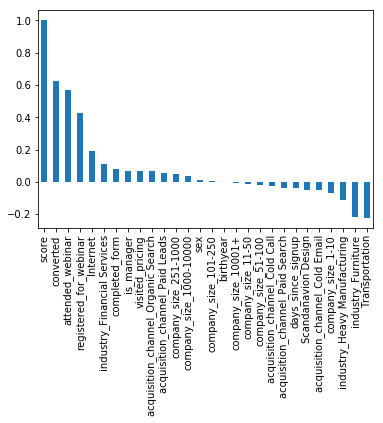

In [20]:
# Correlation chart between score and other categories
# 1 means 100% correlation
df.select_dtypes(include=[np.number]).corr()['score'].sort_values(ascending=False).plot.bar()

## Compare features between customers that were converted

Sale conversion comparison within sex column


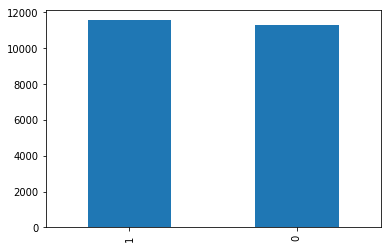

----------------------------------------------------------------------------------------------------

Sale conversion comparison within days_since_signup column


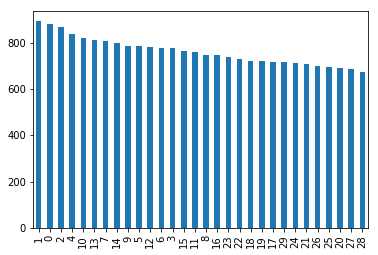

----------------------------------------------------------------------------------------------------

Sale conversion comparison within acquisition_channel column


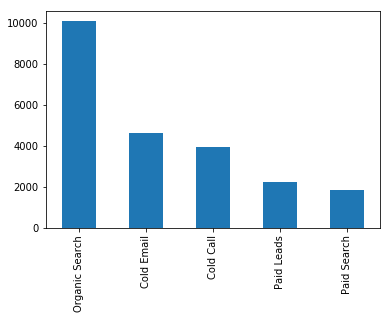

----------------------------------------------------------------------------------------------------

Sale conversion comparison within job_title column


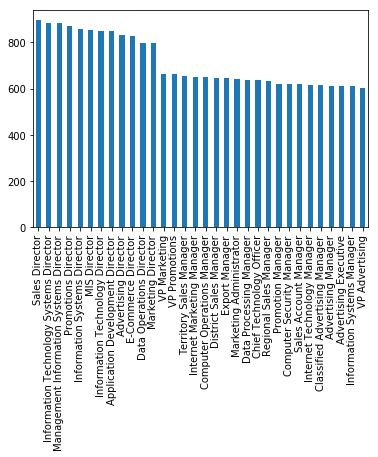

----------------------------------------------------------------------------------------------------

Sale conversion comparison within completed_form column


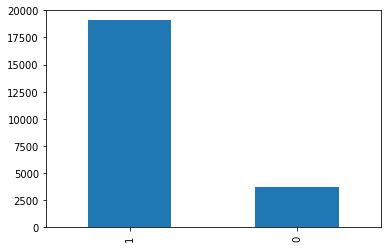

----------------------------------------------------------------------------------------------------

Sale conversion comparison within visited_pricing column


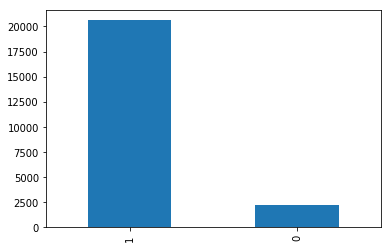

----------------------------------------------------------------------------------------------------

Sale conversion comparison within registered_for_webinar column


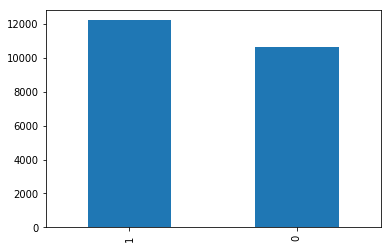

----------------------------------------------------------------------------------------------------

Sale conversion comparison within attended_webinar column


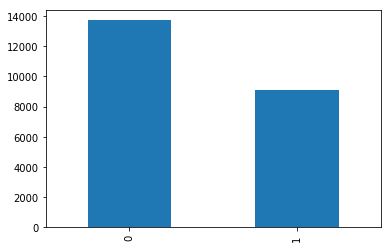

----------------------------------------------------------------------------------------------------

Sale conversion comparison within industry column


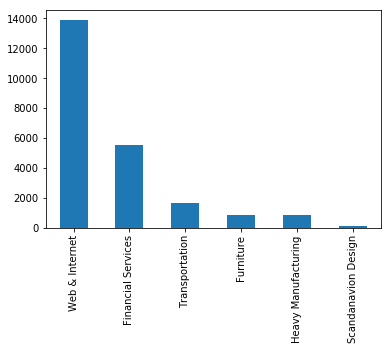

----------------------------------------------------------------------------------------------------

Sale conversion comparison within is_manager column


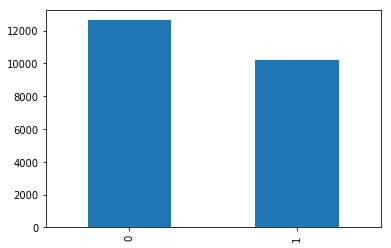

----------------------------------------------------------------------------------------------------



In [21]:
chosenList = ['sex', 'days_since_signup', 'acquisition_channel', 'job_title', 
              'completed_form', 'visited_pricing', 'registered_for_webinar', 
              'attended_webinar', 'industry', 'is_manager']
for i in chosenList:
    print("Sale conversion comparison within",i,'column')
    df[df.converted == 1][i].value_counts().sort_values(ascending=False).plot.bar()
    plt.show();
    print("-"*100)
    print()

## Compare features between customers that were converted (in percent of all customers)

Sale conversion comparison within sex column


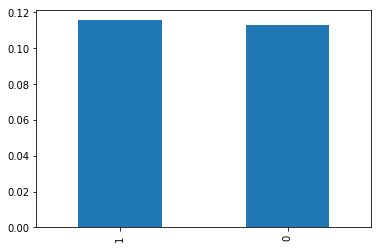

----------------------------------------------------------------------------------------------------

Sale conversion comparison within days_since_signup column


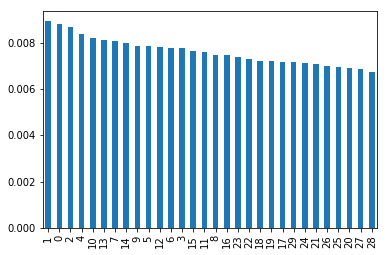

----------------------------------------------------------------------------------------------------

Sale conversion comparison within acquisition_channel column


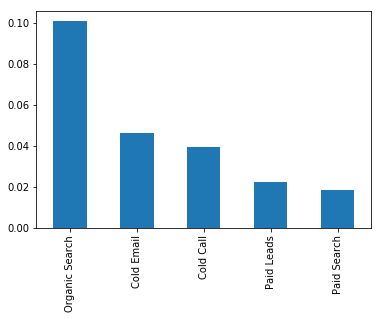

----------------------------------------------------------------------------------------------------

Sale conversion comparison within job_title column


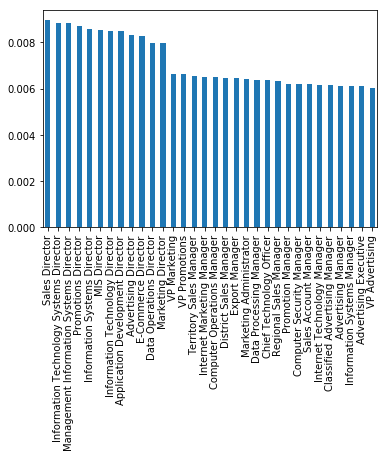

----------------------------------------------------------------------------------------------------

Sale conversion comparison within completed_form column


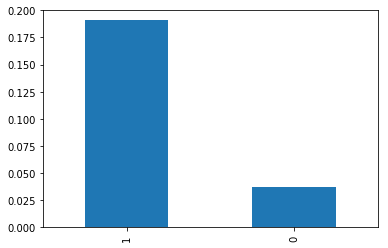

----------------------------------------------------------------------------------------------------

Sale conversion comparison within visited_pricing column


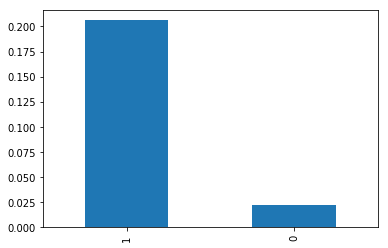

----------------------------------------------------------------------------------------------------

Sale conversion comparison within registered_for_webinar column


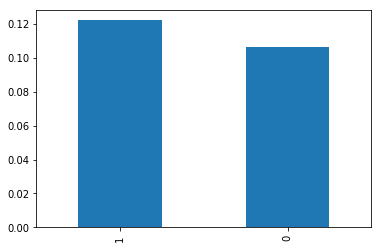

----------------------------------------------------------------------------------------------------

Sale conversion comparison within attended_webinar column


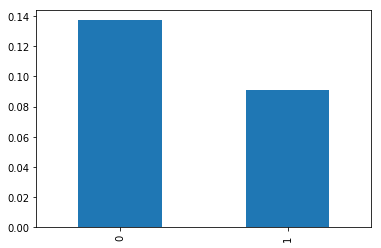

----------------------------------------------------------------------------------------------------

Sale conversion comparison within industry column


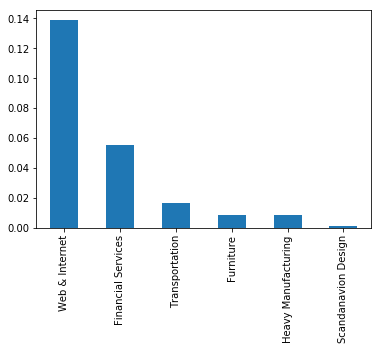

----------------------------------------------------------------------------------------------------

Sale conversion comparison within is_manager column


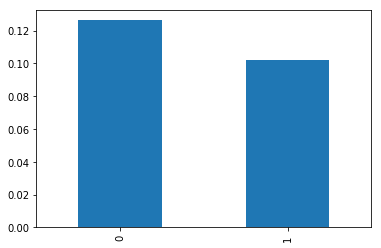

----------------------------------------------------------------------------------------------------



In [22]:
chosenList = ['sex', 'days_since_signup', 'acquisition_channel', 'job_title', 
              'completed_form', 'visited_pricing', 'registered_for_webinar', 
              'attended_webinar', 'industry', 'is_manager']
for i in chosenList:
    print("Sale conversion comparison within",i,'column')
    (df[df.converted == 1][i].value_counts()/100000).plot.bar()
    plt.show();
    print("-"*100)
    print()


## Ratio of converted to non-converted customers

Sale conversion ratio comparison within sex column


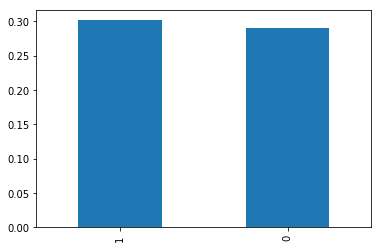

----------------------------------------------------------------------------------------------------

Sale conversion ratio comparison within days_since_signup column


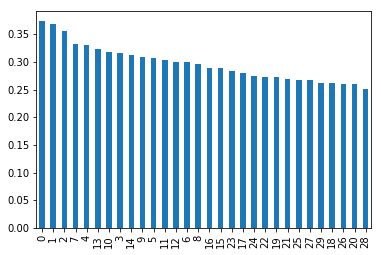

----------------------------------------------------------------------------------------------------

Sale conversion ratio comparison within acquisition_channel column


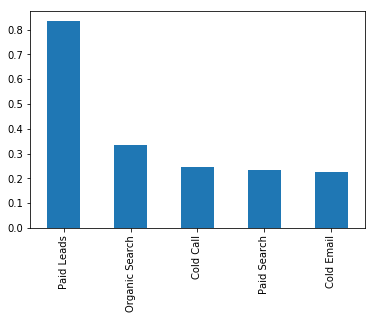

----------------------------------------------------------------------------------------------------

Sale conversion ratio comparison within job_title column


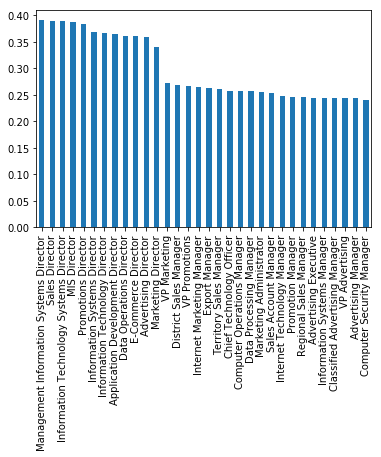

----------------------------------------------------------------------------------------------------

Sale conversion ratio comparison within completed_form column


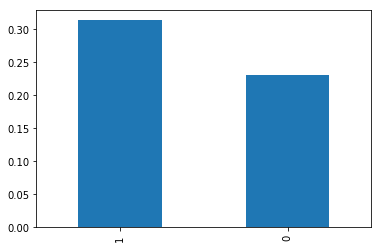

----------------------------------------------------------------------------------------------------

Sale conversion ratio comparison within visited_pricing column


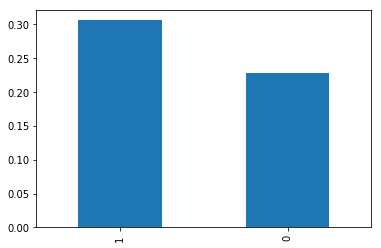

----------------------------------------------------------------------------------------------------

Sale conversion ratio comparison within registered_for_webinar column


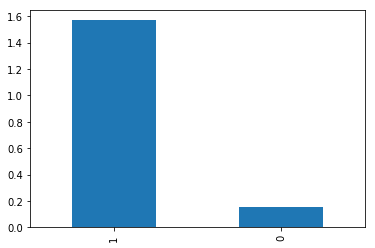

----------------------------------------------------------------------------------------------------

Sale conversion ratio comparison within attended_webinar column


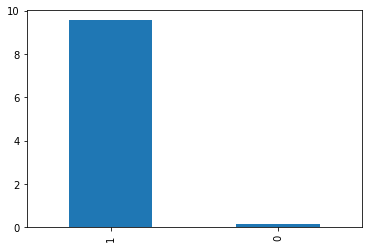

----------------------------------------------------------------------------------------------------

Sale conversion ratio comparison within industry column


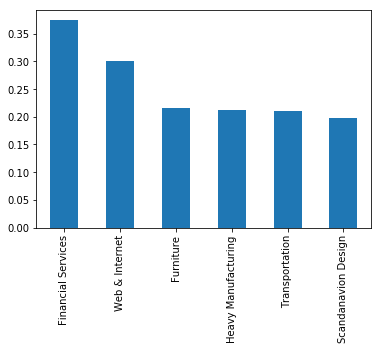

----------------------------------------------------------------------------------------------------

Sale conversion ratio comparison within is_manager column


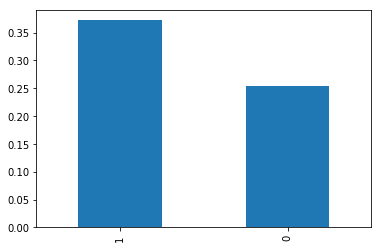

----------------------------------------------------------------------------------------------------



In [26]:
# Higher ratio means better conversion

chosenList = ['sex', 'days_since_signup', 'acquisition_channel', 'job_title', 
              'completed_form', 'visited_pricing', 'registered_for_webinar', 
              'attended_webinar', 'industry', 'is_manager']
for i in chosenList:
    print("Sale conversion ratio comparison within",i,'column')
    (df[df.converted == 1][i].value_counts()/df[df.converted == 0][i].\
     value_counts()).sort_values(ascending=False).plot.bar()
    plt.show();
    print("-"*100)
    print()

# Initial Baseline Predictive Model
## Select only numeric columns, no categoric columns

In [24]:
# Initial Baseline Score Prediction
# Multi Regression
# Correlation Coefficient = ~ 59% Prediction Accuracy
# Training, Test size = .75, .25
# No Validation
################################ 

X = df.select_dtypes(include=[np.number]).drop(['score'], axis=1)
y = df.loc[:, ['score']].values
model_prediction.linear_regression(X,y,.25)

X_train.shape: (75000, 27)
X_test.shape: (25000, 27)
Y_train.shape: (75000, 1)
Y_test.shape: (25000, 1)
y_test_predict: [[118.43046778]
 [110.66684551]
 [ 65.39540227]
 ...
 [ 75.02422737]
 [112.32941457]
 [115.96820177]] :list of prediction
Slope: [ 4.30066162e-01 -1.57750663e-01  9.48894814e+00  1.07213638e+01
  2.22190493e+00  7.18576399e+01  5.72284771e+01  5.26669565e+00
 -6.87479173e-01 -1.99909190e+00  4.42380344e+00  2.85314320e+00
 -4.59037557e+00 -9.84040426e+00  3.78105031e+00  7.49655668e-01
  1.66524055e+00  1.45170000e-01  3.82943804e+00 -3.30150309e-01
  3.47782327e+01 -3.25665885e+01 -3.09603918e+00 -1.62671467e+01
 -1.58152031e+01  3.29667448e+01 -2.48169478e-03]
Intercept: [58.44474245]
MSE: 1561.1917170677111
RMSE: 39.51191867105052
R^2: 0.5916986923002594


array([[118.43046778],
       [110.66684551],
       [ 65.39540227],
       ...,
       [ 75.02422737],
       [112.32941457],
       [115.96820177]])

# Other Predictive Model - Random Forest
## Select only numeric columns, no categoric columns

In [25]:
X = df.select_dtypes(include=[np.number]).drop(['score'], axis=1)
y = df.loc[:, ['score']].values
print(model_prediction.random_forest(X,y,.25), ":list of score prediction")

X_train.shape: (75000, 27)
X_test.shape: (25000, 27)
Y_train.shape: (75000, 1)
Y_test.shape: (25000, 1)
y_test_predict: [ 85.86155894  87.91151973 114.97398275 ... 151.         202.42244151
  65.76806085] :list of prediction
Accuracy: 64.06004303179546 %
[ 85.86155894  87.91151973 114.97398275 ... 151.         202.42244151
  65.76806085] :list of score prediction
